## Author : Isha Anirudha Dhanawade

### GRIP January 2022 - Sparks Foundation


### Technical Task 02 - Predict using Unsupervised ML(K-Mean Clustering)

#### In this task we will predict optimum number of clusters and represent it visually using K-Mean Clustering Algorithm

#### 1)Lodind the dataset

In [12]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [4]:
#Reading data from the dataset
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2)Analyzing the data

In [5]:
#shape of data
iris.shape

(150, 6)

In [6]:
#feature of dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#information about dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#description of dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#finding null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There are no null values in our dataset

In [10]:
#finding correlation between the data
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### 3)Visualizing the Data

<AxesSubplot:>

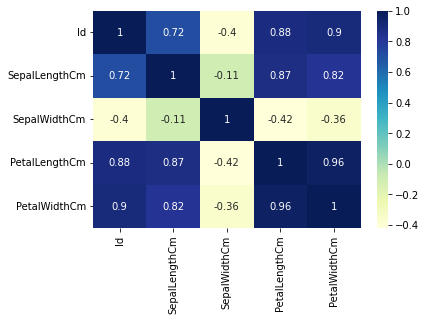

In [13]:
#visualizing correlation between features
sns.heatmap(iris.corr(),annot = True,cmap = 'YlGnBu')

Text(0.5, 1.0, 'Species Data')

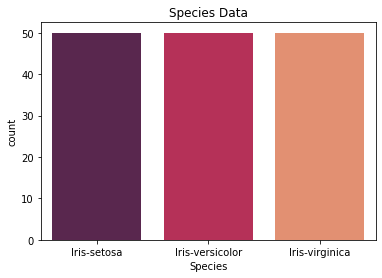

In [14]:
sns.countplot(x = "Species", data = iris, palette = 'rocket')
plt.title("Species Data")

Text(0.5, 1.0, 'SepalLength vs SepalWidth')

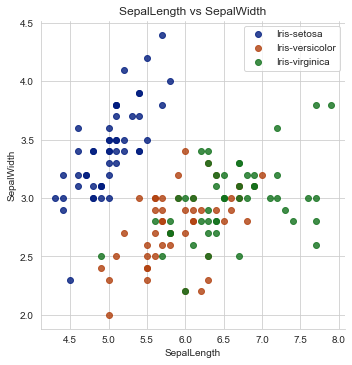

In [15]:
sns.set_style("whitegrid")
sns.lmplot(x = "SepalLengthCm", y = "SepalWidthCm", data = iris, hue = "Species", palette = "dark", fit_reg = False, legend = False)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend(loc="upper right")
plt.title("SepalLength vs SepalWidth")

Text(0.5, 1.0, 'PetalLength vs PetalWidth')

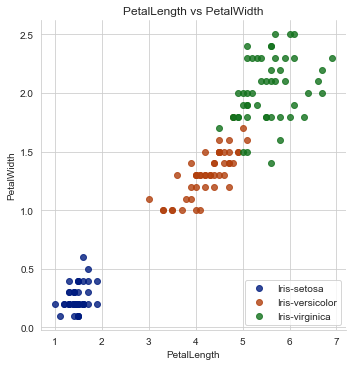

In [16]:
sns.set_style("whitegrid")
sns.lmplot(x = "PetalLengthCm", y = "PetalWidthCm", data = iris, hue = "Species", palette = "dark", fit_reg = False, legend = False)
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")
plt.legend(loc="lower right")
plt.title("PetalLength vs PetalWidth")

### 4)Finding optimum number of cluster for K-Means(using elbow method)

In [18]:
#Finding optimum number of cluster for K-Means Classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
print(f"Sum of Squared Error: ")
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(f"wcss {i} : {kmeans.inertia_}")
    
    

Sum of Squared Error: 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


wcss 1 : 281831.54466666654
wcss 2 : 70581.3808
wcss 3 : 31320.711199999994
wcss 4 : 17758.792503556186
wcss 5 : 11468.968747023802
wcss 6 : 7921.863473076923
wcss 7 : 5911.632365518538
wcss 8 : 4541.979023391812
wcss 9 : 3571.911095588236
wcss 10 : 2943.9331008403374


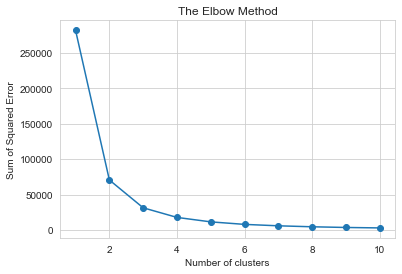

In [19]:
#Plotting result on graph to find elbow point
plt.plot(range(1, 11), wcss,marker = "o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error') 
plt.show()

#### From above graph we can clearly say that our elbow point is at k=3

In [20]:
#as we got elbow point 3 we will select k=3 to train the model

#creating k-means classifier
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42,max_iter=300)

#predicting output for each datapoint
y_pred = kmeans.fit_predict(x)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
#checking which species are in which cluster
iris["cluster"] = y_pred
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [22]:
#centroid of each cluster
centroid = kmeans.cluster_centers_
print(centroid)

[[125.5     6.588   2.974   5.552]
 [ 25.5     5.006   3.418   1.464]
 [ 75.5     5.936   2.77    4.26 ]]


### Visualization of Cluster

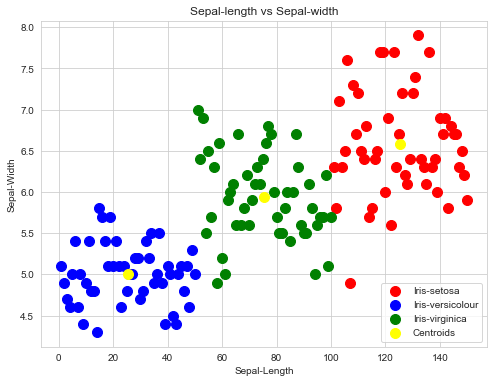

In [24]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.title("Sepal-length vs Sepal-width")
plt.xlabel("Sepal-Length")
plt.ylabel("Sepal-Width")

plt.legend(loc = "lower right")

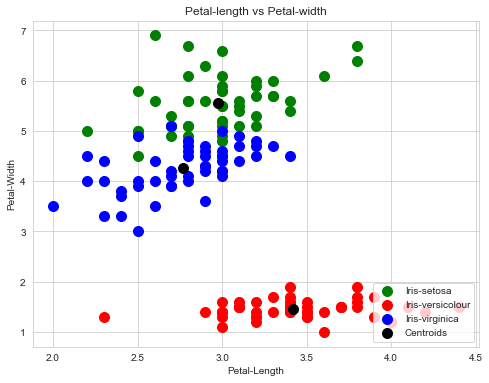

In [25]:
# Visualising the clusters - petal-width and petal-length
plt.figure(figsize=(8,6))
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3],s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3],s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],s = 100, c = 'black', label = 'Centroids')

plt.title("Petal-length vs Petal-width")
plt.xlabel("Petal-Length")
plt.ylabel("Petal-Width")

plt.legend(loc = "lower right")

## CONCLUSION

#### From this task we understood that how fast and efficiently datapoints can be categorized into the group using K-Means algorithm even when very little information is available about data